# Preface


## SME - Synthetic UK Businesses financial statistics

### Описание

Информация о многих данных используемых в финансовом секторе недоступна рядовому пользователю. Финансовые организации, в погоне за прибылью, используют всю возможную информацию о своих клиентах, и редко ей делятся. Поэтому для исследований в таких областях как fraud detection или credit scoring часто используются синтетические данные, как в данном случае.

[Данный датасет](https://www.kaggle.com/datasets/nayaone/sme-uk-businesses-financial-statistics) содержит финансовую и базовую информацию о 1000 малых и средних предприятий Великобритании. В сумме он содержит более 200 аттрибутов, которые могут быть использованы для оценки выживаемости и успешности предприятий.

### Содержание

Датасеты, присутстующие в данном наборе:

    Account Receivable: Funds that customers owe your company for products or services that have been invoiced.
    Businesses: List of enterprises and their information
    Covid: Financial stats of the companies during the pandemic waves
    Credit Account History: History of a credit account and usage of
    Credit Card History: History of the credit card usage and debt amount of an enterprise
    Credit Rating: credit rating of listed businesses which is a quantified assessment of the creditworthiness of a borrower in general terms or with respect to a financial obligation.
    Director: UK Individual who is on the Director position in companies listed in Businesses
    Factoring: Financial transaction and a type of debtor finance in which a business sells its accounts receivable to a third party at a discount.
    Individual: UK Individuals information
    Loan: Information of the paid and unpaid Loans by the enterprise


# QAOA vs ?

# Dataset

## S&P 500 stock data

### Описание

[Данный датасет](https://www.kaggle.com/datasets/camnugent/sandp500/data) представляет собой данные за пять лет по рынку акций списка [S&P 500](https://stockanalysis.com/list/sp-500-stocks/).

### Содержание

Файл данных содержит следующие колонки:

- Date - in format: yy-mm-dd
- Open - price of the stock at market open (this is NYSE data so all in USD Billions)
- High - Highest price reached in the day
- Low Close - Lowest price reached in the day
- Volume - Number of shares traded
- Name - the stock's ticker name

### Предобработка

## Выбор пула стоков

Современные NISQ системы показывают приемлимые результаты для данной модели в пределе пула размером 20, поэтому мы ограничимся таким числом.
В целях исследования, разобъем исследуемые данные на три группы - по максимальному достигнутому значению цены акции (High) для каждой компании (Name). Выберем интервал "до 30B$", "от 30B$ до 100B$", и "от 100B$". В первых двух интервалах выберем по пять компаний, в последнем десять.

In [1]:
import pandas as pd
pf_df = pd.read_csv('./datasets/all_stocks_5yr.csv')

In [2]:
pf_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  str    
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  str    
dtypes: float64(4), int64(1), str(2)
memory usage: 33.1 MB


In [3]:
pf_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
pf_df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [5]:
# Уберем из списка стоки с NA данными
pf_df.drop(pf_df.loc[pf_df['open'].isna(), 'Name'].isin(pf_df['Name']).index, inplace=True)
pf_df.drop(pf_df.loc[pf_df['high'].isna(), 'Name'].isin(pf_df['Name']).index, inplace=True)
pf_df.drop(pf_df.loc[pf_df['low'].isna(), 'Name'].isin(pf_df['Name']).index, inplace=True)

In [6]:
# Преобразование типов
pf_df = pf_df.convert_dtypes()

In [7]:
pf_df.info()

<class 'pandas.DataFrame'>
Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  string 
 1   open    619029 non-null  Float64
 2   high    619029 non-null  Float64
 3   low     619029 non-null  Float64
 4   close   619029 non-null  Float64
 5   volume  619029 non-null  Int64  
 6   Name    619029 non-null  string 
dtypes: Float64(4), Int64(1), string(2)
memory usage: 40.7 MB


In [8]:
pf_df['date'] = pd.to_datetime(pf_df['date'])
pf_df.info()

<class 'pandas.DataFrame'>
Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619029 non-null  datetime64[us]
 1   open    619029 non-null  Float64       
 2   high    619029 non-null  Float64       
 3   low     619029 non-null  Float64       
 4   close   619029 non-null  Float64       
 5   volume  619029 non-null  Int64         
 6   Name    619029 non-null  string        
dtypes: Float64(4), Int64(1), datetime64[us](1), string(1)
memory usage: 40.7 MB


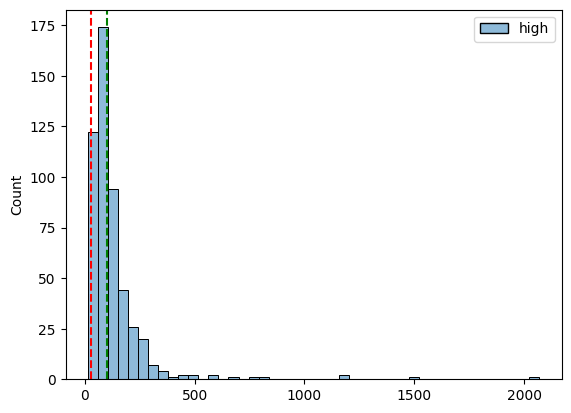

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=pf_df[['high', 'Name']].groupby(['Name']).max())
plt.axvline(x=30, color='red', linestyle='--')
plt.axvline(x=100, color='green', linestyle='--')

# QSVM vs SVM

In [10]:
import os
cds_ls = [pd.read_csv(os.path.join('./datasets/credit_scoring', f)) for f in os.listdir('./datasets/credit_scoring')]
cds_ls[0].info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    1000 non-null   int64  
 1   borough_county                1000 non-null   str    
 2   address                       1000 non-null   str    
 3   contact_phone_no              1000 non-null   str    
 4   primary_sector                1000 non-null   str    
 5   entity_trade_name             1000 non-null   str    
 6   company_type                  1000 non-null   str    
 7   entity_name                   1000 non-null   str    
 8   company_reg_number            1000 non-null   int64  
 9   annual_turnover               1000 non-null   str    
 10  number_of_employees           1000 non-null   str    
 11  number_of_officers            1000 non-null   int64  
 12  incorporation_date            1000 non-null   str    
 13  entity_status  

# VQC

# [Grover's Algorithm]

# Conclusion